In [2]:
import numpy as np
import ast
import matplotlib.pyplot as plt
import glob
import plotly.express as px
import seaborn as sns
import pandas as pd

Dict1: dir_metrics
(Key) dirictory names, (value) directory of metrics
Dict2: equation metrics
(Key) dataset name, (value) list of list of metrics for different equations

In [13]:
dirs_to_get_results_from = ['AIFPostProc', 'GPLBPostProc', 'GPLearnPostProc']
dir_metrics = {}
for dir in dirs_to_get_results_from:
    fname = glob.glob(dir+"/*_equation_metrics.txt")
    file = open(fname[0], 'r')
    data = file.read().split('\n')[1:]
    i = 0
    equation_metrics = {}
    while (i) < (len(data)):
        if data[i] == '':
            i+=1
            continue
        dataset_name = data[i]
        i+=1
        metrics = []
        while (data[i] != '') and i+1 < len(data):
            equation = data[i]
            metrics.append(ast.literal_eval(data[i+1]))
            i+=2
        equation_metrics[dataset_name] = metrics
        i+=1
    dir_metrics[dir] = equation_metrics

File format:
First line is Info line
Then ...
Dataset name
Equation name
Metrics list as specified by info line (RMSE, MAE, R2)

Data for population size gridsearch for GPLearn

In [ ]:
lists = [[],[],[],[],[]]
f = open(file,"r")
lines = f.readlines()
f.close()
i=4
while i < (len(lines)):
    for j in range(2):
        lists[j].append(float(lines[i].split(",")[0][1:]))
        print(lines[i].split(",")[0][1:])
        i+=2
    try:
        for j in range(2,5):
            lists[j].append(float(lines[i].split(",")[0].split(" ")[-1][1:]))
            print(lines[i].split(",")[0].split(" ")[-1][1:])
            i+=2
    except:
        pass
    i+=2

In [12]:
print(glob.glob("Results/gpl2/*.txt"))

['Results/gpl2/gpl2_eqn_result.txt', 'Results/gpl2/gpl2_result.txt', 'Results/gpl2/gplearn_alt_results_eqn.txt', 'Results/gpl2/gplearn_alt_ridge_result.txt']


In [54]:
files = glob.glob("Results/gpl2/*.txt")
alg_names = ["Equation","Ridge", "Equation Alt", "Ridge Alt"]
# Dicts for different datasets
gpl2_results = [{},{},{},{},{}]
alg_counter = 0
for file in files:
    print(alg_names[alg_counter])
    f = open(file,"r")
    lines = f.readlines()
    f.close()
    i=4
    dataset_counter = 0
    while i < (len(lines)):
        rmses = []
        for j in range(2):
            rmses.append(float('{:g}'.format(float('{:.3g}'.format(float(lines[i].split(",")[0][1:]))))))
            print(lines[i].split(",")[0][1:])
            i+=2
        try:
            for j in range(2,5):
                rmses.append(float('{:g}'.format(float('{:.3g}'.format(float(lines[i].split(",")[0].split(" ")[-1][1:]))))))
                print(lines[i].split(",")[0].split(" ")[-1][1:])
                i+=2
        except:
            pass
        gpl2_results[dataset_counter][alg_names[alg_counter]] = rmses
        dataset_counter +=1
        i+=2
    alg_counter+=1

Equation
0.23226868261170402
0.2686290721415407
0.49431771045707845
0.857412316096797
1.3133264719140756
0.099488349400004
0.009972430894432041
400.721366268379
3513.6519933050427
14539.951457219908
0.11778503200816422
13.899530878275327
0.027117001216727457
0.03576059804249921
0.04125137813245619
0.2179502601630278
0.21176091931899527
0.23735890747703622
0.15096029074823464
0.3643269544638207
0.5070333515895077
0.4788351722757248
0.5016183359358473
Ridge
0.09854899176259566
0.08577333555576033
0.48052615969489815
0.8190297886466318
1.2911005843105954
0.00028578621127428784
0.00043520250148977536
400.7229911003207
3513.655122369412
14539.953186667017
0.04459320138316021
13.893450967790468
0.03350300459668012
0.06671701473342549
0.09569726862001508
0.05780872801157062
0.1357567360789265
0.1555060685112222
0.08477779114702894
0.35640735224317766
0.5029761506980794
0.4730828643658557
0.49620280044367276
Equation Alt
0.23226851870422074
0.26862900391244116
0.4943186231141573
0.857413358242

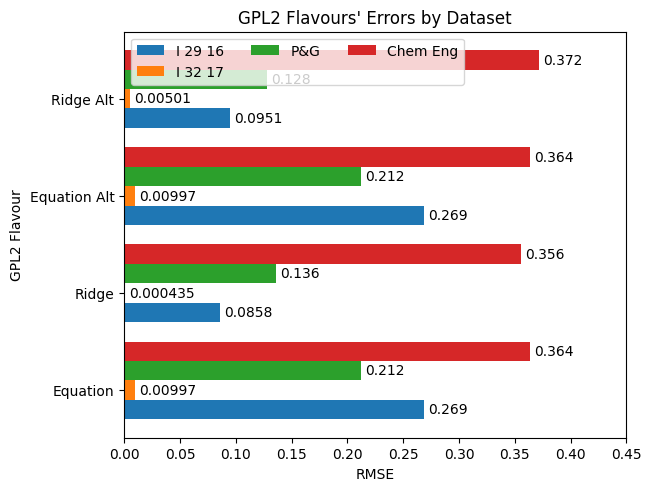

In [61]:
# import matplotlib.pyplot as plt
# import numpy as np
# penguin_means = {
#     'Bill Depth': (18.35, 18.43, 14.98),
#     'Bill Length': (38.79, 48.83, 47.50),
#     'Flipper Length': (189.95, 195.82, 217.19),
# }
test_dict = {}
dataset_names = ['I 29 16', 'I 32 17', 'I 13 12', 'P&G', 'Chem Eng']
for i in range(5):
    test_dict[dataset_names[i]] = []
    for alg,rmses in gpl2_results[i].items():
        test_dict[dataset_names[i]].append(rmses[1])
del test_dict['I 13 12']
x = np.arange(len(alg_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_dict.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('RMSE')
ax.set_ylabel('GPL2 Flavour')
ax.set_title('GPL2 Flavours\' Errors by Dataset')
ax.set_yticks(x + width, alg_names)
ax.legend(loc='upper left', ncols=3)
ax.set_xlim(0, 0.45)

plt.show()

In [18]:
#name = [ 1,  7,  2,  4,  6,  3,  5,  9, 10,  8, 11]
score_list = [0.3098965 , 0.23348066, 0.27949392, 0.25327145, 0.24552301,
       0.27871515, 0.2478758 , 0.21004557, 0.20256745, 0.23302645,
       0.18853675,0.19162198, 0.2064162 , 0.22601692, 0.21098008, 0.19502678]
configs = [{'population_size': 50}, {'population_size': 100}, {'population_size': 200}, {'population_size': 300}, {'population_size': 400}, {'population_size': 500}, {'population_size': 600}, {'population_size': 700}, {'population_size': 800}, {'population_size': 900}, {'population_size': 1000},{'population_size': 1100}, {'population_size': 1200}, {'population_size': 1300}, {'population_size': 1400}, {'population_size': 1500}]
tuples = sorted(zip(score_list,configs),reverse=False)
score_list, configs = [t[0] for t in tuples], [t[1] for t in tuples]

In [22]:
populations = [configs[i]['population_size'] for i in range(len(configs))]

[Text(0.5, 0, 'Population Size'), Text(0, 0.5, 'CV Mean RMSE')]

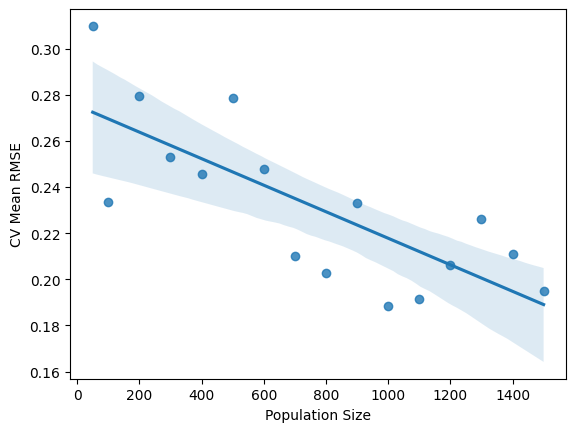

In [31]:
#plt.plot(populations,score_list,'x')
ax = sns.regplot(x=populations,y=score_list)
ax.set(xlabel='Population Size', ylabel='CV Mean RMSE')

In [52]:
files = glob.glob("Results/gpl4/gpl4_complexity*.txt")
alg_names = ["Measure 1", "Measure 2"]
# Dicts for different datasets
complexity_results = [{},{},{},{},{}]
alg_counter = 0
for file in files:
    print(alg_names[alg_counter])
    f = open(file,"r")
    lines = f.readlines()
    f.close()
    i=5
    dataset_counter = 0
    while i < (len(lines)):
        rmses = []
        for j in range(2):
            rmses.append(float('{:g}'.format(float('{:.3g}'.format(float(lines[i].split(",")[0][1:]))))))
            print(lines[i].split(",")[0][1:])
            i+=3
        try:
            for j in range(2,5):
                rmses.append(float('{:g}'.format(float('{:.3g}'.format(float(lines[i].split(",")[0].split(" ")[-1][1:]))))))
                #rmses.append(float(lines[i].split(",")[0].split(" ")[-1][1:]))
                print(lines[i].split(",")[0].split(" ")[-1][1:])
                i+=3
        except:
            pass
        complexity_results[dataset_counter][alg_names[alg_counter]] = rmses
        dataset_counter +=1
        i+=2
    alg_counter+=1

Measure 1
0.09763113063034244
0.08482014461043463
0.47149917723407314
0.8003106435269436
1.2598271661911693
0.00028578621127428784
0.00043520250148977536
400.7229911003207
3513.655122369412
14539.953186667017
0.04217522976152884
13.888039459365736
0.04477264679516681
0.0425553961476526
0.09201370002692953
0.06362232594458203
0.13728648991862033
0.15110529514768795
0.08363171732112336
0.3514014754233774
0.5092974227489069
0.47569998333242747
0.49774337767304905
Measure 2
0.0967999538585084
0.08312496751848852
0.45916631613727676
0.7816775710110156
1.2272684160307454
0.00028578621127428784
0.00043520250148977536
400.7229911003207
3513.655122369412
14539.953186667017
0.04217522976152884
13.888039459365736
0.04477264679516681
0.0425553961476526
0.09201370002692953
0.06424825092522317
0.13597255657012774
0.15305123979640894
0.08363171732112336
0.3514014754233774
0.5092974227489069
0.47569998333242747
0.49774337767304905


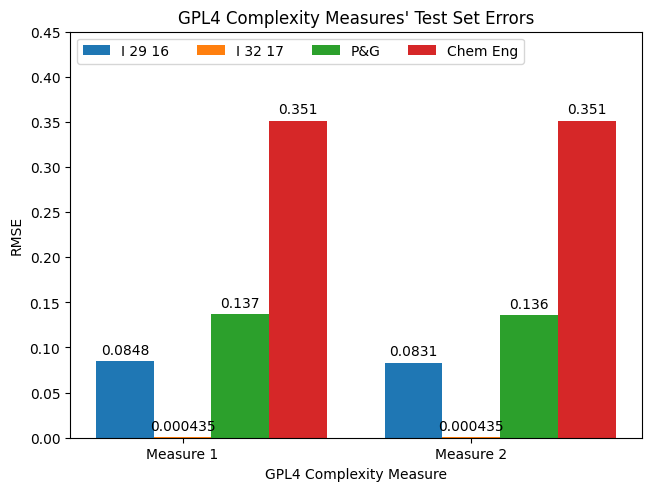

In [53]:
test_dict = {}
dataset_names = ['I 29 16', 'I 32 17', 'I 13 12', 'P&G', 'Chem Eng']
for i in range(5):
    test_dict[dataset_names[i]] = []
    for alg,rmses in complexity_results[i].items():
        test_dict[dataset_names[i]].append(rmses[1])
del test_dict['I 13 12']
x = np.arange(len(alg_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_xlabel('GPL4 Complexity Measure')
ax.set_title('GPL4 Complexity Measures\' Test Set Errors')
ax.set_xticks(x + width, alg_names)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 0.45)

plt.show()

['Results/gpl4/gpl4_mean_stacked.txt', 'Results/gpl4/gpl4_ridge_stacked.txt', 'Results/gpl4/gpl4_median_stacked.txt']
Mean
34.78328480710547
35.678698639092886
34.415409107631305
35.490782594398944
35.923656030856385
531374.9890714071
3950.2241738347084
1816.4358456945436
5678.572694692149
14435.330943839634
5.048270297614267
26.635137762900985
0.677202460285849
1.1062081467449847
1.6680327793667697
0.7194703317996098
0.7495626165877219
0.8882532385011029
38.0751669937519
6.658953118427316
0.4335947345489956
0.30201837235377704
0.35236307315828874
Ridge
0.23676024178037627
0.27369976780986716
0.3973483809125438
0.6298621512327177
0.8718716320071864
0.09923148745134194
0.01150509949354044
400.7270281395868
3513.660648092317
14539.965870806216
0.10437684387367162
13.906073888333358
0.1517431974633793
0.31593058756658654
0.4877340906251844
0.1831542562808467
0.21870467611959948
0.25144720713062546
0.14700531324144062
0.34820334747768894
0.3567785334181465
0.24371416339265722
0.22069035110

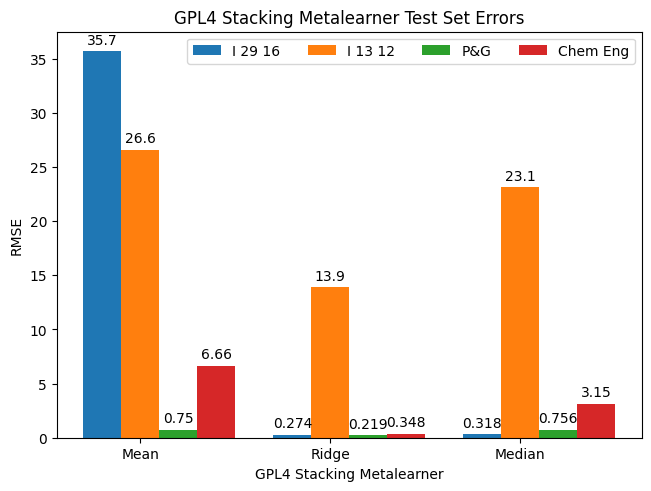

In [63]:
files = glob.glob("Results/gpl4/gpl4_*stacked.txt")
print(files)
alg_names = ["Mean", "Ridge", "Median"]
# Dicts for different datasets
complexity_results = [{},{},{},{},{}]
alg_counter = 0
for file in files:
    print(alg_names[alg_counter])
    f = open(file,"r")
    lines = f.readlines()
    f.close()
    i=5
    dataset_counter = 0
    while i < (len(lines)):
        rmses = []
        for j in range(2):
            rmses.append(float('{:g}'.format(float('{:.3g}'.format(float(lines[i].split(",")[0][1:]))))))
            print(lines[i].split(",")[0][1:])
            i+=3
        try:
            for j in range(2,5):
                rmses.append(float('{:g}'.format(float('{:.3g}'.format(float(lines[i].split(",")[0].split(" ")[-1][1:]))))))
                print(lines[i].split(",")[0].split(" ")[-1][1:])
                i+=3
        except:
            pass
        complexity_results[dataset_counter][alg_names[alg_counter]] = rmses
        dataset_counter +=1
        i+=2
    alg_counter+=1
test_dict = {}
dataset_names = ['I 29 16', 'I 32 17', 'I 13 12', 'P&G', 'Chem Eng']
for i in range(5):
    test_dict[dataset_names[i]] = []
    for alg,rmses in complexity_results[i].items():
        test_dict[dataset_names[i]].append(rmses[1])
del test_dict['I 32 17']
x = np.arange(len(alg_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_xlabel('GPL4 Stacking Metalearner')
ax.set_title('GPL4 Stacking Metalearner Test Set Errors')
ax.set_xticks(x + width, alg_names)
ax.legend(loc='upper right', ncols=4)
#ax.set_ylim(0, 0.45)

plt.show()

AI Feynman Equations for different datasets

In [ ]:
chem_eng = "1.019905392223+(-sin(((exp(x3))**(-1)+1)))"
I_29_16 = "-1.78653240712045*x0**4 + 2.74265653938113*x0**3*x1 + 0.693478261551717*x0**3*x2 + 1.51893966797091*x0**3*x3 + 1.05809008885949*x0**3 - 8.90914108369895*x0**2*x1**2 + 2.313184902286*x0**2*x1*x2 - 0.610302506906684*x0**2*x1*x3 + 4.05496763865446*x0**2*x1 - 3.22927796065915*x0**2*x2**2 + 1.29979906947473*x0**2*x2*x3 + 0.15046637172591*x0**2*x2 - 1.61035966953248*x0**2*x3**2 - 1.19721783718238*x0**2*x3 + 0.916547527042824*x0**2 + 5.39603485787952*x0*x1**3 - 1.6173427947285*x0*x1**2*x2 + 0.383548360293983*x0*x1**2*x3 + 1.76441931827289*x0*x1**2 + 3.86511779058008*x0*x1*x2**2 - 6.63031604860491*x0*x1*x2*x3 - 0.812507810095345*x0*x1*x2 + 5.3167415030509*x0*x1*x3**2 - 1.66566774388912*x0*x1*x3 - 6.86009686529627*x0*x1 + 1.27933668152043*x0*x2**3 - 0.000487641774845338*x0*x2**2*x3 - 0.172199420407091*x0*x2**2 + 3.50679075029294*x0*x2*x3**2 - 3.11836370281625*x0*x2*x3 + 0.985158726474076*x0*x2 - 0.192325630918204*x0*x3**3 - 2.02646110837012*x0*x3**2 + 2.84384347457019*x0*x3 + 0.196014891336504*x0 - 2.65579982616603*x1**4 + 1.01123115252492*x1**3*x2 - 1.02738822067868*x1**3*x3 + 1.91103495717656*x1**3 - 1.48133741198047*x1**2*x2**2 + 3.60307516183734*x1**2*x2*x3 - 1.22789238226051*x1**2*x2 - 0.253656919771413*x1**2*x3**2 - 0.426339158867328*x1**2*x3 + 1.53639910649094*x1**2 + 1.20205181332284*x1*x2**3 + 2.90365915471729*x1*x2**2*x3 - 2.94865040383283*x1*x2**2 + 1.69359945768018*x1*x2*x3**2 - 6.31086756719515*x1*x2*x3 + 3.35114643527818*x1*x2 + 2.27577015639516*x1*x3**3 - 6.22113612429261*x1*x3**2 + 5.16620337634322*x1*x3 - 0.702704845621252*x1 - 3.84125205092138*x2**4 - 1.64291153517017*x2**3*x3 + 7.73906047122299*x2**3 - 3.55616229900037*x2**2*x3**2 + 4.69630959166568*x2**2*x3 - 5.21572955088661*x2**2 - 1.02102682070146*x2*x3**3 + 3.19921260306238*x2*x3**2 - 2.136739287076*x2*x3 + 0.905009209983947*x2 - 0.045554310405127*x3**4 - 0.171269324160102*x3**3 + 1.54297942292242*x3**2 - 1.47996378070159*x3 + 0.254932167900225"
pg_expr = "-0.621212000000*(sqrt(sqrt((x1*x0)))-1)"
I_32_17 = "tan(0.000001116206*(x2*(x3+asin((x0+x1)))))"
I_13_12 = "0.745558006473+(x2*(atan((x3-x4))-(x3-x4)))"

SyRBo stages gridsearch

Text(0, 0.5, 'CV Mean RMSE')

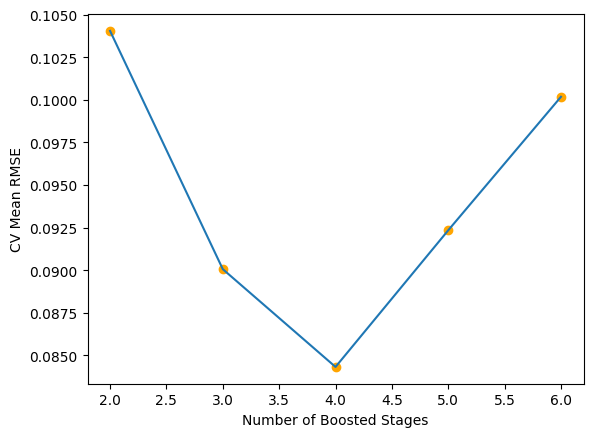

In [13]:
#mean_rmse = [0.04497459, 0.04503245, 0.04498375, 0.04545825, 0.04542634]
#mean_rmse = [0.12575717, 0.16337677, 0.1122365 , 0.11542805, 0.15032507]
mean_rmse = [0.10404021, 0.09006197, 0.08432723, 0.09234535, 0.10017543]
stages = [2,3,4,5,6]
plt.plot(stages,mean_rmse)
plt.scatter(stages,mean_rmse,color='orange')
#ax = sns.regplot(x=stages,y=mean_rmse)
plt.xlabel('Number of Boosted Stages')
plt.ylabel('CV Mean RMSE')

Bar chart for the full variable set vs reduced variable set on GPL4

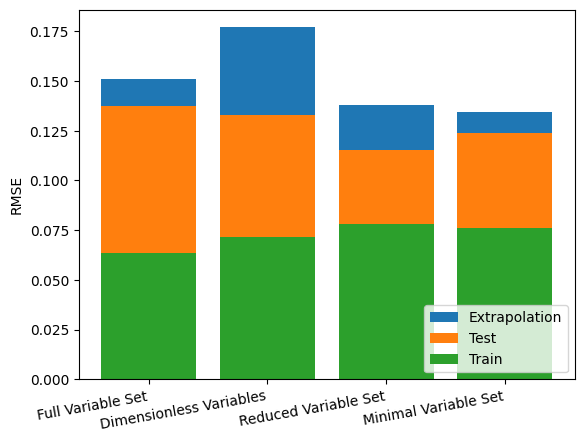

In [68]:
train = [0.06362232594458203,0.0713,0.07793143729859871,0.07621278708034135]
test = [0.13728648991862033,0.133,0.11523049046868056,0.12391906733457095]
extrap = [0.15110529514768795, 0.177,0.13786740548139667,0.13430887814357295]

labels = ["Full Variable Set", "Dimensionless Variables", "Reduced Variable Set", "Minimal Variable Set"]

#, bottom=train)
plt.bar(labels, extrap,label="Extrapolation")#, bottom=test)
plt.bar(labels, test,label="Test")
plt.bar(labels,train,label="Train")
plt.legend(loc="lower right",ncols=1)
plt.ylabel("RMSE")
plt.xticks(rotation=10, ha='right')
plt.show()

In [17]:
f = open("Results/gpl4/gpl4_I_29_16_pareto_fronts.txt","r")
lines = f.readlines()
f.close()
print(lines[0])
i = 0
open_array = False
xs = []
ys = []
x = []
y = []
while i < len(lines):
    str = list(filter(None, lines[i].split(' ')))
    counter = 0
    fst = str[counter][1:]
    if fst == '[' or fst == '':
        counter+=1
        fst = str[counter]
    if fst[0] == '[':
        fst = fst[1:]
    x.append(float(fst))
    counter +=1
    y.append(float(str[counter]))
    if len(str[-1]) >1 and str[-1][1] == ']':
        xs.append(x)
        ys.append(y)
        x = []
        y = []
    i+=1

#print(list(filter(None, lines[0].split(' '))))

[[0.17470578 4.        ]

[0.17470578
0.22939842
0.23306012
[0.12067646
0.22939842
0.23306012
0.23676024
[0.12067646
0.22939842
0.23306012
0.23676024
0.10145647
0.1018473
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
[0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
[0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
0.09802564
0.0985394
0.09854899
0.0995504
0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
0.09802564
0.0985394
0.09854899
0.0995504
0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
0.09802564
0.0985394
0.09854899
0.0995504
0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
0.09802564
0.0985394
0.09854899
0.0995504
0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
0.09802564
0.0985394
0.09854899
0.0995504
0.10075936
0.11795327
0.12036714
0.12067646
0.22939842
0.23306012
0.23676024
0.09802564
0.0985394
0.

In [16]:
(list(filter(None, lines[38].split(' '))))

['[', '0.12036714', '6.', ']\n']

In [21]:
len(xs)

20

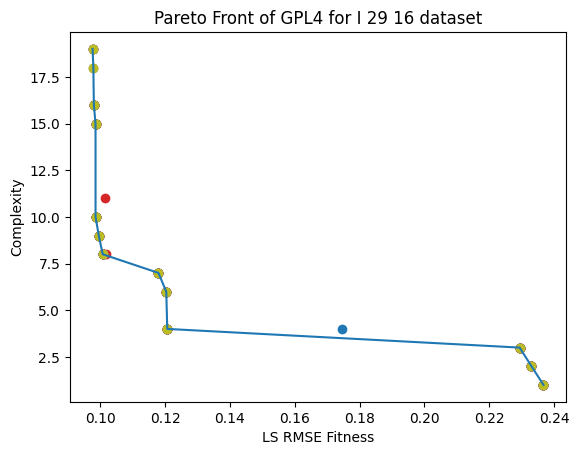

In [31]:
for i in range(len(xs)-1):
    plt.scatter(xs[i],ys[i])
plt.plot(xs[-1],ys[-1])
plt.xlabel("LS RMSE Fitness")
plt.ylabel("Complexity")
plt.title("Pareto Front of GPL4 for I 29 16 dataset")
plt.show()

{'GPL4 Test': [0.139, 0.0641, 0.000424, 0.136, 0.351], 'P&G Test': [0.138, 0.066, 0.009, 0.15, 0.28], 'GPL4 Extrap 1': [0.0448, 0.343, 0.399, 0.153, 0.509], 'P&G Extrap 1': [0.02, 0.464, 0.401, 0.163, 0.539]}
<BarContainer object of 5 artists>
[0.139, 0.0641, 0.000424, 0.136, 0.351]
<BarContainer object of 5 artists>
[0.138, 0.066, 0.009, 0.15, 0.28]
<BarContainer object of 5 artists>
[0.0448, 0.343, 0.399, 0.153, 0.509]
<BarContainer object of 5 artists>
[0.02, 0.464, 0.401, 0.163, 0.539]


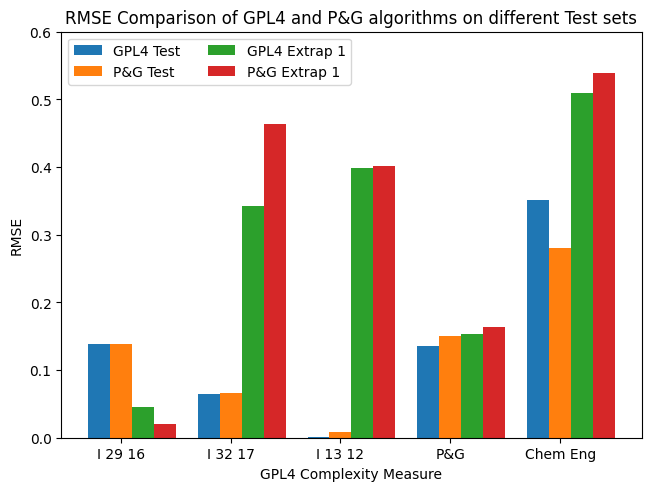

In [28]:
# Test & Extrap1
GPL4_data = (np.array([[0.139, 0.0448],
        [0.0641,0.343],
        [0.000424,0.399],
        [0.136,0.153],
        [0.351,0.509]]))
pg_data = (np.array([[0.138, 0.020],
           [0.066,0.464],
           [0.009,0.401],
           [0.150,0.163],
           [0.28,0.539]]))
datas = [GPL4_data[:,0],pg_data[:,0],GPL4_data[:,1],pg_data[:,1]]
test_dict = {}
dataset_names = ['I 29 16', 'I 32 17', 'I 13 12', 'P&G', 'Chem Eng']
alg_names = ["GPL4 Test", "P&G Test","GPL4 Extrap 1","P&G Extrap 1"]
for i in range(4):
    test_dict[alg_names[i]] = []
    for j in range(5):
        test_dict[alg_names[i]].append((datas[i])[j])
#del test_dict['I 13 12']
print(test_dict)
x = np.arange(len(dataset_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    print(rects)
    #ax.bar_label(rects, padding=3)
    print(measurement)
    #for i in range(len(measurement)):
        #ax.text(x + offset, measurement[i],str(measurement[i]),rotation="vertical")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_xlabel('GPL4 Complexity Measure')
ax.set_title("RMSE Comparison of GPL4 and P&G algorithms on different Test sets")
#ax.set_xticks(x + width, alg_names)
ax.set_xticks(x + width, dataset_names)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 0.6)

plt.show()

{'GPL4 Test': [0.139, 0.0641, 0.000424, 0.136, 0.351], 'P&G Test': [0.138, 0.066, 0.009, 0.15, 0.28], 'GPL4 Extrap 1': [0.0448, 0.343, 0.399, 0.153, 0.509], 'P&G Extrap 1': [0.02, 0.464, 0.401, 0.163, 0.539]}
<BarContainer object of 5 artists>
[0.139, 0.0641, 0.000424, 0.136, 0.351]
<BarContainer object of 5 artists>
[0.138, 0.066, 0.009, 0.15, 0.28]
<BarContainer object of 5 artists>
[0.0448, 0.343, 0.399, 0.153, 0.509]
<BarContainer object of 5 artists>
[0.02, 0.464, 0.401, 0.163, 0.539]


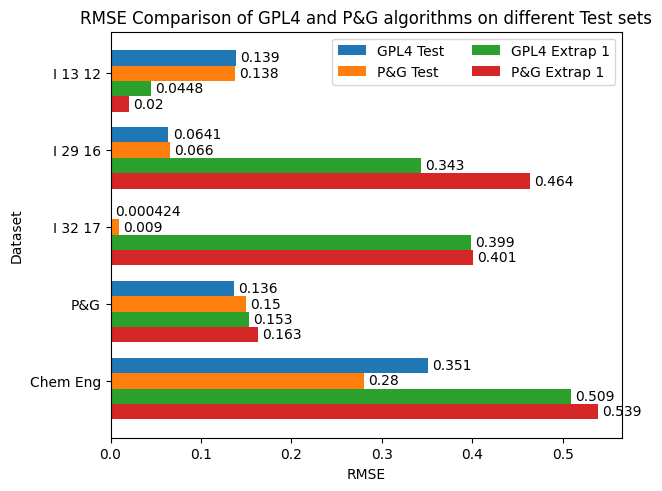

In [40]:
GPL4_data = (np.array([[0.139, 0.0448],
        [0.0641,0.343],
        [0.000424,0.399],
        [0.136,0.153],
        [0.351,0.509]]))
pg_data = (np.array([[0.138, 0.0200],
           [0.0660,0.464],
           [0.00900,0.401],
           [0.150,0.163],
           [0.280,0.539]]))
datas = [GPL4_data[:,0],pg_data[:,0],GPL4_data[:,1],pg_data[:,1]]
test_dict = {}
dataset_names = ['I 13 12','I 29 16', 'I 32 17' , 'P&G', 'Chem Eng']
alg_names = ["GPL4 Test", "P&G Test","GPL4 Extrap 1","P&G Extrap 1"]
for i in range(4):
    test_dict[alg_names[i]] = []
    for j in range(5):
        test_dict[alg_names[i]].append((datas[i])[j])
#del test_dict['I 13 12']
print(test_dict)
x = np.arange(len(dataset_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in test_dict.items():
    offset = width * multiplier
    rects = ax.barh(x + offset,measurement, width, label=attribute)
    print(rects)
    ax.bar_label(rects, padding=3)
    print(measurement)
    #for i in range(len(measurement)):
        #ax.text(x + offset, measurement[i],str(measurement[i]),rotation="vertical")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('RMSE')
ax.set_ylabel('Dataset')
ax.set_title("RMSE Comparison of GPL4 and P&G algorithms on different Test sets")
#ax.set_xticks(x + width, alg_names)
ax.set_yticks(x + width, labels=dataset_names)
ax.invert_yaxis()
ax.legend(loc='upper right', ncols=2)
#ax.set_ylim(0, 0.6)

plt.show()